In [ ]:
! pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.6 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=8a4bde148071a3eb97000afb2a904ad60361b17d870e87c990a8a7e57beaae0b
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import openml

adult = openml.datasets.get_dataset(1590)

X, y, _, _ = adult.get_data(target=adult.default_target_attribute)

In [ ]:
X.shape, y.shape

((48842, 14), (48842,))

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802.0,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40,United-States
1,38,Private,89814.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50,United-States
2,28,Local-gov,336951.0,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40,United-States
3,44,Private,160323.0,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40,United-States
4,18,NaN,103497.0,Some-college,10,Never-married,NaN,Own-child,White,Female,0.0,0.0,30,United-States


In [ ]:
## check all of the values for the redundant naming

for col in X.columns:
  print(f'{col}: {X[col].unique()}')



gender_counts = X['sex'].value_counts()
print(gender_counts)

age: [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass: ['Private', 'Local-gov', NaN, 'Self-emp-not-inc', 'Federal-gov', 'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
Categories (8, object): ['Private' < 'Self-emp-not-inc' < 'Self-emp-inc' < 'Federal-gov' <
                         'Local-gov' < 'State-gov' < 'Without-pay' < 'Never-worked']
fnlwgt: [226802.  89814. 336951. ... 129912. 255835. 257302.]
education: ['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th', ..., 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool']
Length: 16
Categories (16, object): ['Bachelors' < 'Some-college' < '11th' < 'HS-grad' ... '10th' < 'Doctorate' <
                          '5th-6th' < 'Preschool']
education-num: [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status: ['Never-married', 'Mar

In [ ]:
import pandas as pd

print("original features :\n", list(X.columns), "\n")
data_dummies = pd.get_dummies(X)
print("new features :\n", list(data_dummies.columns))

original features :
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'] 

new features :
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_Self-emp-inc', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_State-gov', 'workclass_Without-pay', 'workclass_Never-worked', 'education_Bachelors', 'education_Some-college', 'education_11th', 'education_HS-grad', 'education_Prof-school', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_9th', 'education_7th-8th', 'education_12th', 'education_Masters', 'education_1st-4th', 'education_10th', 'education_Doctorate', 'education_5th-6th', 'education_Preschool', 'marital-status_Married-civ-spouse', 'marital-status_Divorced', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Wi

In [ ]:
data_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Self-emp-not-inc,workclass_Self-emp-inc,workclass_Federal-gov,...,native-country_Guatemala,native-country_Nicaragua,native-country_Scotland,native-country_Thailand,native-country_Yugoslavia,native-country_El-Salvador,native-country_Trinadad&Tobago,native-country_Peru,native-country_Hong,native-country_Holand-Netherlands
0,25,226802.0,7,0.0,0.0,40,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38,89814.0,9,0.0,0.0,50,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28,336951.0,12,0.0,0.0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,44,160323.0,10,7688.0,0.0,40,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18,103497.0,10,0.0,0.0,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_dummies.shape

(48842, 105)

In [ ]:
features = data_dummies.loc[:, 'age':'occupation_Transport-moving']

X = features.values
data_dummies.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Private', 'workclass_Self-emp-not-inc',
       'workclass_Self-emp-inc', 'workclass_Federal-gov',
       ...
       'native-country_Guatemala', 'native-country_Nicaragua',
       'native-country_Scotland', 'native-country_Thailand',
       'native-country_Yugoslavia', 'native-country_El-Salvador',
       'native-country_Trinadad&Tobago', 'native-country_Peru',
       'native-country_Hong', 'native-country_Holand-Netherlands'],
      dtype='object', length=105)

In [ ]:
y

,class
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8512816313160265


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
demo_df = pd.DataFrame({"integer feature": [0, 1, 2, 1],
                        "categorical feature": ['socks', 'fox', 'socks', 'box']})
demo_df

,integer feature,categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [ ]:
pd.get_dummies(demo_df)

,integer feature,categorical feature_box,categorical feature_fox,categorical feature_socks
0,0,False,False,True
1,1,False,True,False
2,2,False,False,True
3,1,True,False,False


In [ ]:
demo_df['integer feature'] = demo_df['integer feature'].astype(str)
pd.get_dummies(demo_df, columns=['integer feature', 'categorical feature'])

,integer feature_0,integer feature_1,integer feature_2,categorical feature_box,categorical feature_fox,categorical feature_socks
0,True,False,False,False,False,True
1,False,True,False,False,True,False
2,False,False,True,False,False,True
3,False,True,False,True,False,False


In [ ]:
! pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.5 MB/s eta 0:00:00


In [ ]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.linspace(-3, 3, 1000, endpoint=False)

array([-3.   , -2.994, -2.988, -2.982, -2.976, -2.97 , -2.964, -2.958,
       -2.952, -2.946, -2.94 , -2.934, -2.928, -2.922, -2.916, -2.91 ,
       -2.904, -2.898, -2.892, -2.886, -2.88 , -2.874, -2.868, -2.862,
       -2.856, -2.85 , -2.844, -2.838, -2.832, -2.826, -2.82 , -2.814,
       -2.808, -2.802, -2.796, -2.79 , -2.784, -2.778, -2.772, -2.766,
       -2.76 , -2.754, -2.748, -2.742, -2.736, -2.73 , -2.724, -2.718,
       -2.712, -2.706, -2.7  , -2.694, -2.688, -2.682, -2.676, -2.67 ,
       -2.664, -2.658, -2.652, -2.646, -2.64 , -2.634, -2.628, -2.622,
       -2.616, -2.61 , -2.604, -2.598, -2.592, -2.586, -2.58 , -2.574,
       -2.568, -2.562, -2.556, -2.55 , -2.544, -2.538, -2.532, -2.526,
       -2.52 , -2.514, -2.508, -2.502, -2.496, -2.49 , -2.484, -2.478,
       -2.472, -2.466, -2.46 , -2.454, -2.448, -2.442, -2.436, -2.43 ,
       -2.424, -2.418, -2.412, -2.406, -2.4  , -2.394, -2.388, -2.382,
       -2.376, -2.37 , -2.364, -2.358, -2.352, -2.346, -2.34 , -2.334,
      

In [ ]:
np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)


array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946],
       [-2.94 ],
       [-2.934],
       [-2.928],
       [-2.922],
       [-2.916],
       [-2.91 ],
       [-2.904],
       [-2.898],
       [-2.892],
       [-2.886],
       [-2.88 ],
       [-2.874],
       [-2.868],
       [-2.862],
       [-2.856],
       [-2.85 ],
       [-2.844],
       [-2.838],
       [-2.832],
       [-2.826],
       [-2.82 ],
       [-2.814],
       [-2.808],
       [-2.802],
       [-2.796],
       [-2.79 ],
       [-2.784],
       [-2.778],
       [-2.772],
       [-2.766],
       [-2.76 ],
       [-2.754],
       [-2.748],
       [-2.742],
       [-2.736],
       [-2.73 ],
       [-2.724],
       [-2.718],
       [-2.712],
       [-2.706],
       [-2.7  ],
       [-2.694],
       [-2.688],
       [-2.682],
       [-2.676],
       [-2.67 ],
       [-2.664],
       [-2.658],
       [-2.652

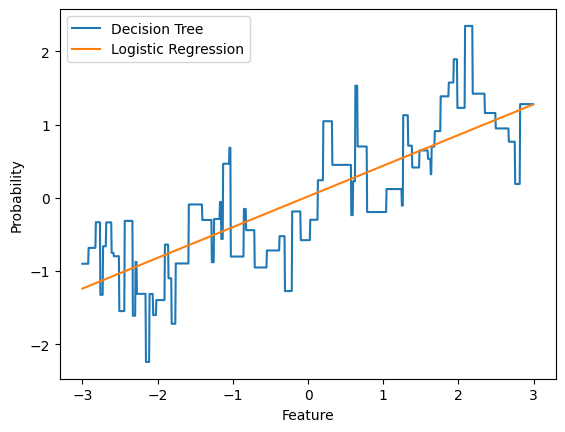

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Logistic Regression")

plt.ylabel("Probability")
plt.xlabel("Feature")
plt.legend()

In [ ]:
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [ ]:
which_bin = np.digitize(X, bins=bins)
print(X[:5])
print(which_bin[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Remove the sparse argument, or set sparse=True if using a newer scikit-learn version.
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
encoder.fit(which_bin)
x_binned = encoder.transform(which_bin)
print(x_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
print(line_binned[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


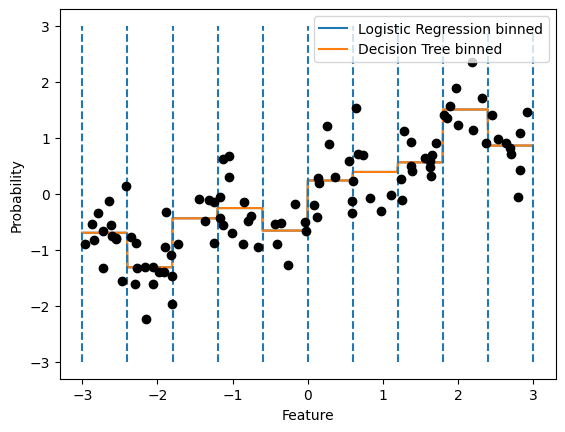

In [ ]:
reg = LinearRegression().fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label="Logistic Regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label="Decision Tree binned")

plt.ylabel("Probability")
plt.xlabel("Feature")
plt.legend()
plt.vlines(bins, -3, 3, linestyles='--')
plt.plot(X[:, 0], y, 'o', c='k')


In [ ]:
x_combined = np.hstack([x_binned, X])
print(x_combined[:5])

[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.75275929]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          1.39196365]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.59195091]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.         -2.06388816]]


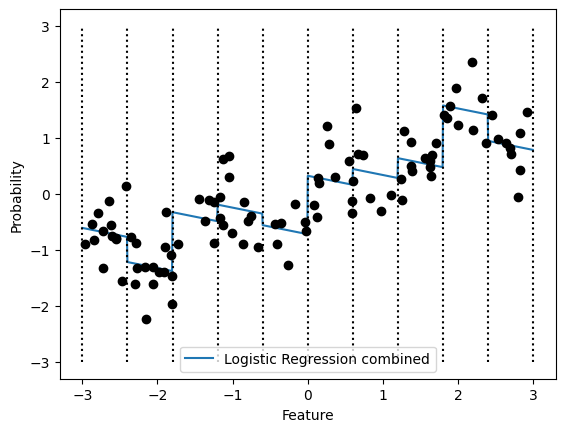

In [ ]:
reg = LinearRegression().fit(x_combined, y)
line_combined = np.hstack([line_binned, line])
plt.plot(line, reg.predict(line_combined), label="Logistic Regression combined")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.ylabel("Probability")
plt.xlabel("Feature")
plt.legend()
plt.plot(X[:, 0], y, 'o', c='k')

In [ ]:
X_product = np.hstack([x_binned, X**x_binned])
print(X_product[:5])
print(X_product.shape)

[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          1.          1.
   1.         -0.75275929  1.          1.          1.          1.
   1.          1.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          1.          1.
   1.          1.          1.          1.          1.          1.39196365
   1.          1.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          1.          1.
   1.          1.          1.          0.59195091  1.          1.
   1.          1.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0.         

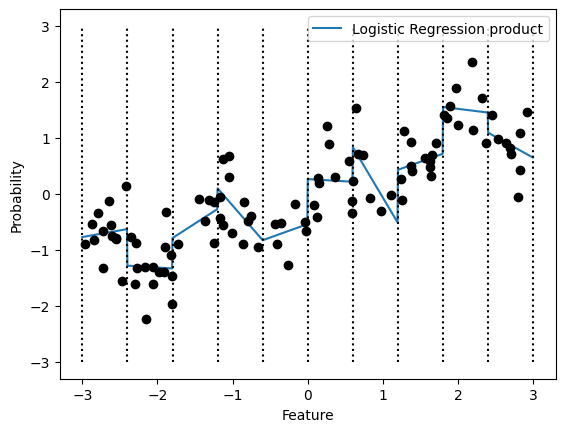

In [ ]:
reg = LinearRegression().fit(X_product, y)

linear_product = np.hstack([line_binned, line**line_binned])
plt.plot(line, reg.predict(linear_product), label="Logistic Regression product")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c="k")
plt.ylabel("Probability")
plt.xlabel("Feature")
plt.legend()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
x_poly = poly.transform(X)

In [ ]:
x_poly.shape

(100, 10)

In [ ]:
print("polynominal feature names: {}".format(poly.get_feature_names_out()))

polynominal feature names: ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


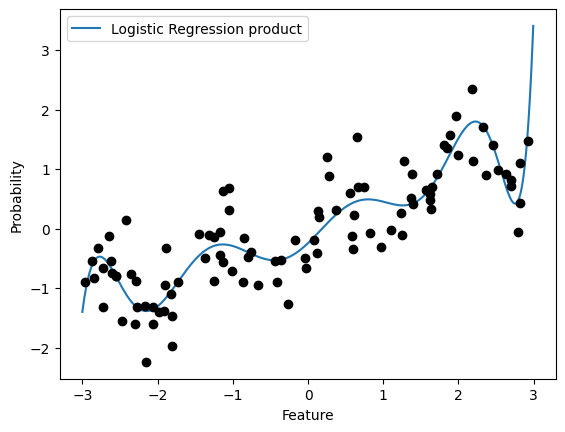

In [ ]:
reg = LinearRegression().fit(x_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="Logistic Regression product")

plt.plot(X[:, 0], y, 'o', c="k")
plt.ylabel("Probability")
plt.xlabel("Feature")
plt.legend()

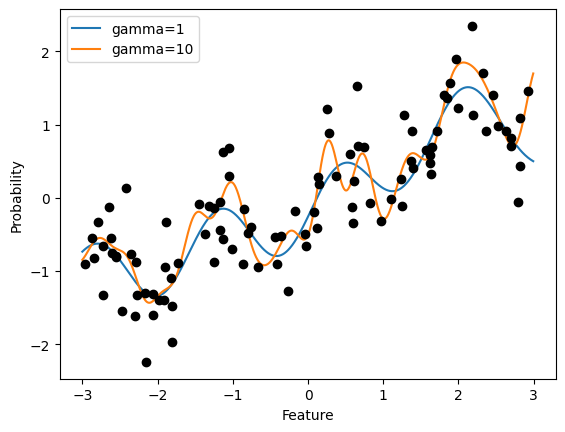

In [ ]:
from sklearn.svm import SVR

for gamma in [1, 10]:
  svr = SVR(kernel='rbf', gamma=gamma, C=10).fit(X, y)
  plt.plot(line, svr.predict(line), label="gamma={}".format(gamma))

plt.plot(X[:, 0], y, 'o', c="k")
plt.ylabel("Probability")
plt.xlabel("Feature")
plt.legend(loc="best")

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

In [ ]:
print("X_poly_train.shape: {}".format(X_poly_train.shape))
print("X_poly_test.shape: {}".format(X_poly_test.shape))
print(poly.get_feature_names_out())

X_poly_train.shape: (15480, 45)
X_poly_test.shape: (5160, 45)
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Training score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_poly_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_poly_test, y_test)))

Training score: 0.58
Training score: 0.61


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)

print("Training set score: {:.2f}".format(rf.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_poly_train, y_train)

print("Training set score: {:.2f}".format(rf.score(X_poly_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_poly_test, y_test)))


Training set score: 0.97
Test set score: 0.79
Training set score: 0.97
Test set score: 0.81


In [ ]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [ ]:
print(np.bincount(X[:, 0]))

[23 32 57 49 68 52 49 49 56 44 35 29 36 33 29 23 18 25 18 17 13 20 24 16
  9 14 12 15 10  5  4  4  3  4  5  5  4  5  3  4  4  3  2  2  0  4  3  2
  2  4  3  7  4  1  1  2  0  3  1  0  0  1  0  2  0  2  2  0  1  1  0  0
  2  0  2  1  1  0  0  1  0  1  0  0  2  0  1  0  1  2  0  0  0  1  0  0
  0  0  1  0  0  0  1  0  0  0  0  1  1  0  0  0  0  1  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1]


In [ ]:
X.shape

(1000, 3)

Text(0.5, 0, 'Value')

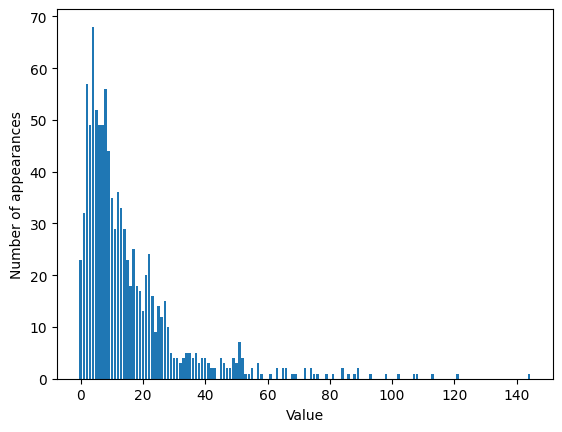

In [ ]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [ ]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.603


In [ ]:
x_train_log = np.log(X_train + 1)
x_test_log = np.log(X_test + 1)

score = Ridge().fit(x_train_log, y_train).score(x_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.870


Text(0.5, 0, 'Value')

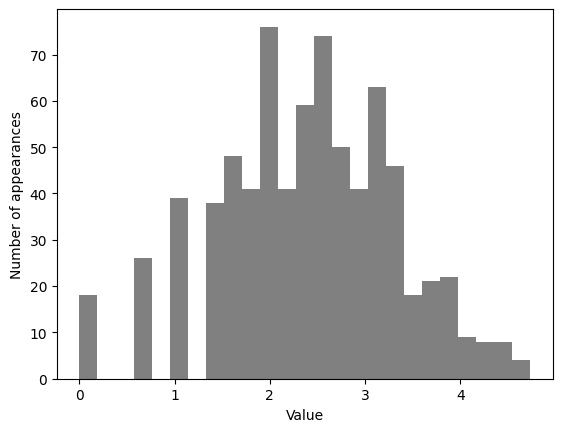

In [ ]:
plt.hist(np.log(X_train[:, 0] + 1), bins=25, color="gray")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [ ]:
#### automatic feature selection

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

print(cancer.data.shape)

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


(569, 30)
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

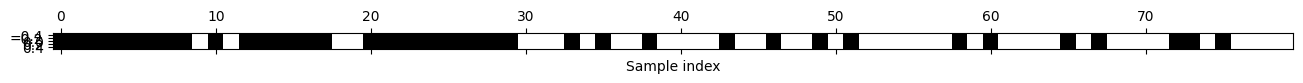

In [ ]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr = LogisticRegression(max_iter=5000).fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


In [ ]:
### model based feature selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [ ]:
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Sample index')

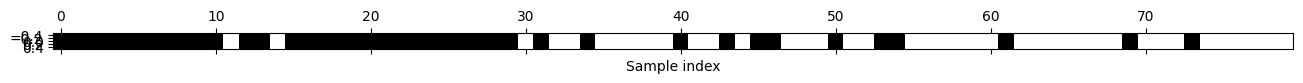

In [ ]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
X_test_l1 = select.transform(X_test)
lr = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(lr))

Test score: 0.947


Text(0.5, 0, 'Sample index')

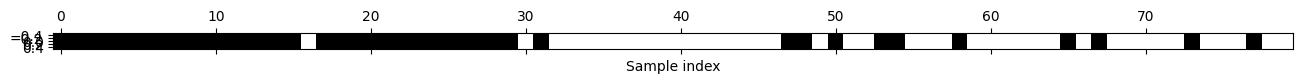

In [ ]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

lr = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train)
print("Test score: {:.3f}".format(lr.score(X_test_rfe, y_test)))

Test score: 0.940


In [ ]:
### use the model used inside of rfe to predict
select.score(X_test, y_test), select.score(X_train, y_train)

(0.9508771929824561, 1.0)

In [ ]:
citibike = mglearn.datasets.load_citibike()

In [ ]:
print("citi bike data {}".format(citibike.head()))

citi bike data starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

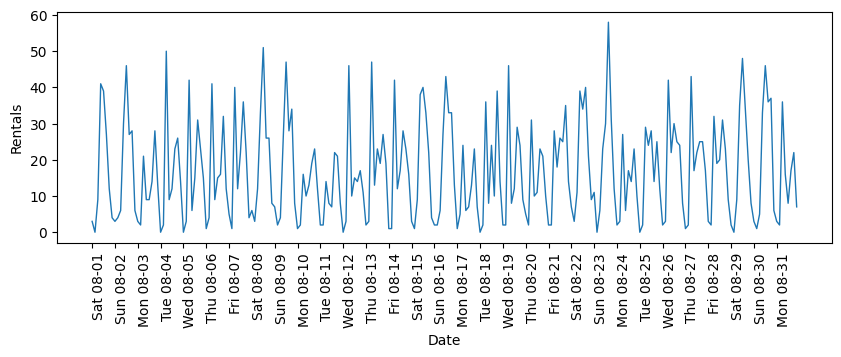

In [ ]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
 freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [ ]:
y = citibike.values

X = citibike.index.strftime("%s").astype(int).values.reshape(-1, 1)

In [ ]:
n_train = 184

def eval_on_features(features, target, regressor):
  X_train, X_test = features[:n_train], features[n_train:]
  y_train, y_test = target[:n_train], target[n_train:]
  regressor.fit(X_train, y_train)
  print("test set r2 : {:.2f}".format(regressor.score(X_test, y_test)))
  y_pred = regressor.predict(X_test)
  y_pred_train = regressor.predict(X_train)
  plt.figure(figsize=(10, 3))
  plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
  plt.plot(range(n_train), y_train, label="train")
  plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
  plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
  plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
  label="prediction test")
  plt.legend(loc=(1.01, 0))
  plt.xlabel("Date")
  plt.ylabel("Rentals")

test set r2 : -0.04


<Figure size 640x480 with 0 Axes>

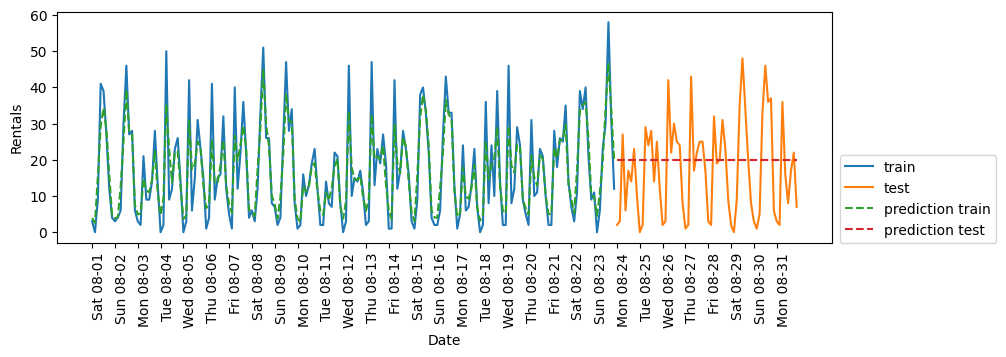

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

test set r2 : 0.60


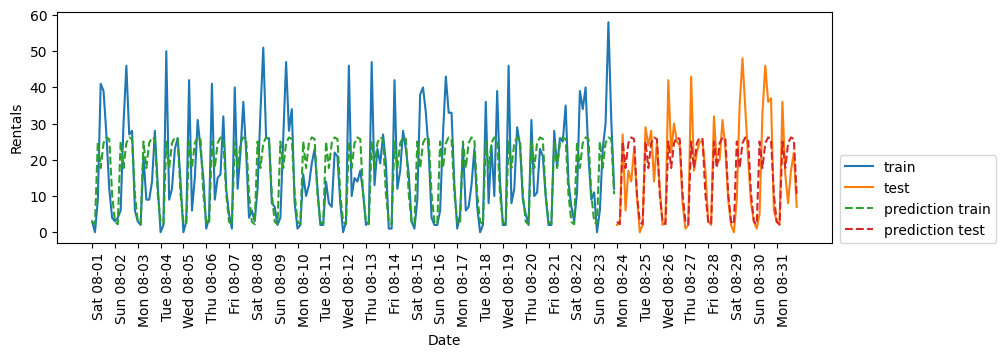

In [ ]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

test set r2 : 0.84


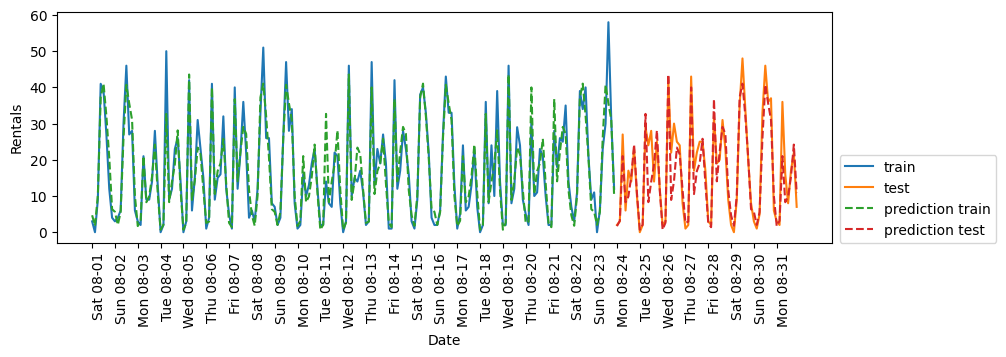

In [ ]:
X_hour_week = np.hstack([X_hour, citibike.index.dayofweek.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

test set r2 : 0.13


<Figure size 640x480 with 0 Axes>

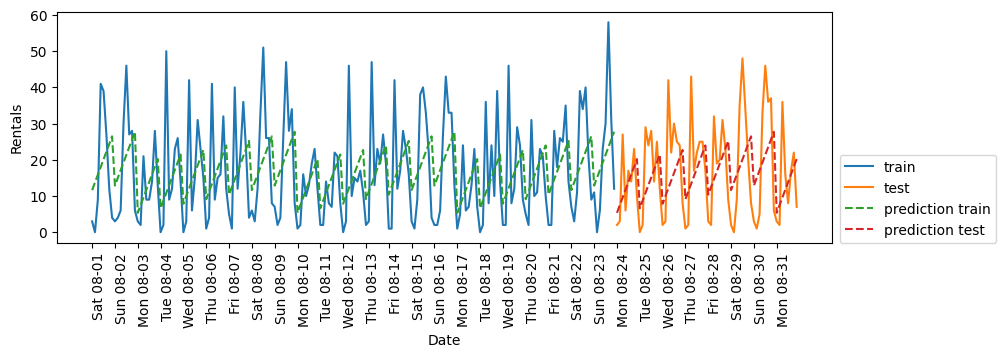

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
plt.figure()
eval_on_features(X_hour_week, y, regressor)

In [ ]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week)
print(X_hour_week_onehot.shape)
print(X_hour_week.shape)

(248, 15)
(248, 2)


test set r2 : 0.62


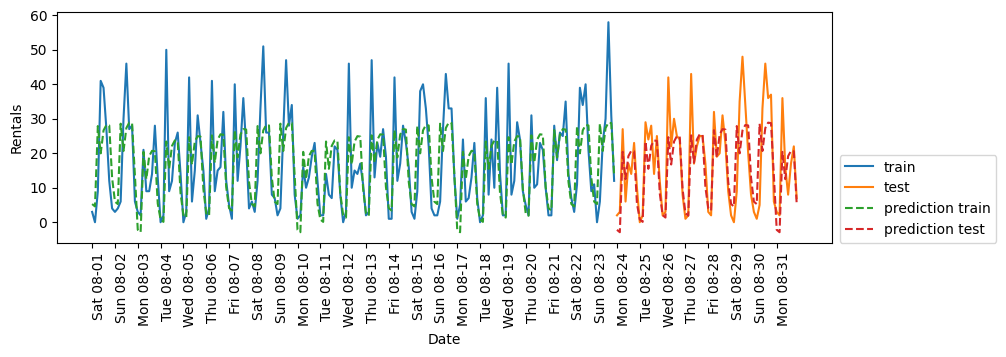

In [ ]:
eval_on_features(X_hour_week_onehot, y, regressor)

test set r2 : 0.85


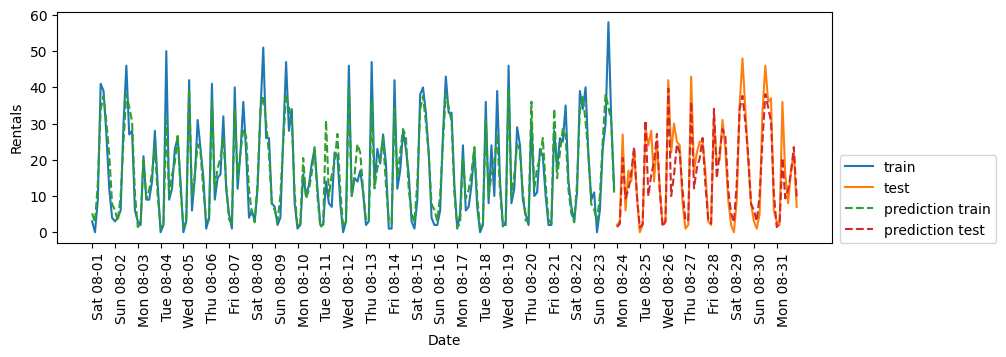

In [ ]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
 include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


In [ ]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature')

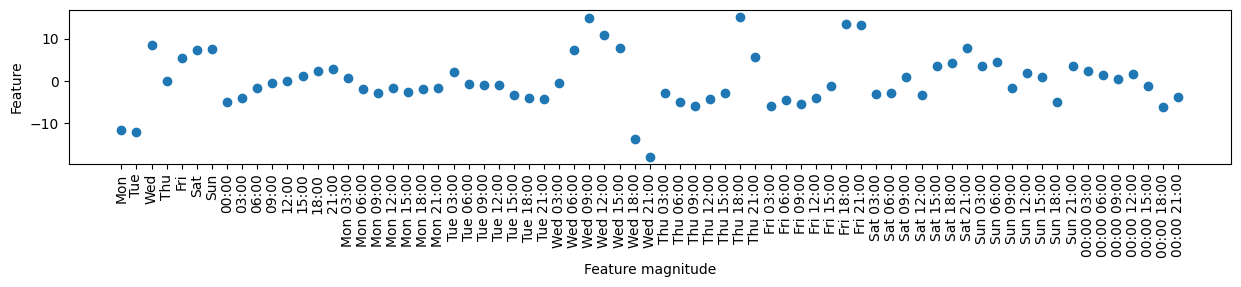

In [ ]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")